<a href="https://colab.research.google.com/github/BlackCode20146231/AI-Homework-II/blob/main/W6_Fuzzy_Logic_11_3_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctal

In [38]:
#Fuzzy Logic
#INPUT
setpoint=ctal.Antecedent(np.arange(0,100,1),'Set Point')
val_sensor= ctal.Antecedent(np.arange(0,100,1),'Valve Sensor')

#OUTPUT
pwm=ctal.Consequent(np.arange(0,256,1),'PWM')
#Fuzzy membership function

# Setpoint Level
setpoint['Low Tem']=fuzz.trapmf(setpoint.universe,[0,0,0,18])
setpoint['Normal Tem']=fuzz.trimf(setpoint.universe,[18,27,40])
setpoint['High Tem']=fuzz.trapmf(setpoint.universe,[28,40,100,100])
#setpoint.view()

#Vale Level
val_sensor['Very Low']=fuzz.trapmf(val_sensor.universe,[0,0,0,5])
val_sensor['Low']=fuzz.trimf(val_sensor.universe,[5,16,25])
val_sensor['Normal']=fuzz.trimf(val_sensor.universe,[16,32,40])
val_sensor['High']=fuzz.trimf(val_sensor.universe,[40,60,70])
val_sensor['Very High']=fuzz.trapmf(val_sensor.universe,[70,100,100,100])
#val_sensor.view()

#Speed Of Motor Level
pwm['Very Low']=fuzz.trimf(pwm.universe,[0,70,70])
pwm['Low']=fuzz.trimf(pwm.universe,[70,100,100])
pwm['Normal']=fuzz.trimf(pwm.universe,[100,150,200])
pwm['Very High']=fuzz.trimf(pwm.universe,[150,200,255])
pwm['High']=fuzz.trimf(pwm.universe,[200,255,255])

In [40]:
# Set Rule for Machine
rule_1=ctal.Rule(setpoint['Low Tem']&val_sensor['Very Low'],pwm['Very Low'])
rule_2=ctal.Rule(setpoint['Low Tem']&val_sensor['Low'],pwm['Low'])
rule_3=ctal.Rule(setpoint['Low Tem']&val_sensor['Normal'],pwm['Normal'])
rule_4=ctal.Rule(setpoint['Low Tem']&val_sensor['High'],pwm['Very High'])
rule_5=ctal.Rule(setpoint['Low Tem']&val_sensor['Very High'],pwm['Very High'])

rule_6=ctal.Rule(setpoint['Normal Tem']&val_sensor['Very Low'],pwm['Very Low'])
rule_7=ctal.Rule(setpoint['Normal Tem']&val_sensor['Low'],pwm['Very Low'])
rule_8=ctal.Rule(setpoint['Normal Tem']&val_sensor['Normal'],pwm['Normal'])
rule_9=ctal.Rule(setpoint['Normal Tem']&val_sensor['High'],pwm['High'])
rule_10=ctal.Rule(setpoint['Normal Tem']&val_sensor['Very High'],pwm['High'])

rule_11=ctal.Rule(setpoint['High Tem']&val_sensor['Very Low'],pwm['Very Low'])
rule_12=ctal.Rule(setpoint['High Tem']&val_sensor['Low'],pwm['Very Low'])
rule_13=ctal.Rule(setpoint['High Tem']&val_sensor['Normal'],pwm['Low'])
rule_14=ctal.Rule(setpoint['High Tem']&val_sensor['High'],pwm['Normal'])
rule_15=ctal.Rule(setpoint['High Tem']&val_sensor['Very High'],pwm['Normal'])

pwm_control=ctal.ControlSystem([rule_1,rule_2,rule_3,rule_4,rule_5,
                                rule_6,rule_7,rule_8,rule_9,rule_10,
                                rule_11,rule_12,rule_13,rule_14,rule_15])
pwm_value=ctal.ControlSystemSimulation(pwm_control)

PWM Vaule: 204.11715199461392


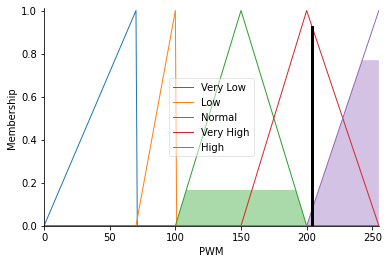

In [41]:
#INPUT VALUE
pwm_value.input['Set Point']= 30
pwm_value.input['Valve Sensor']= 60
#COMPUTING
pwm_value.compute()
#SHOW RESULT
print('PWM Vaule:',pwm_value.output['PWM'])
pwm.view(sim=pwm_value)